# C207 Activity Sheet 8 Solutions

## 1. What three factors affect the frequency width of a spectral line?

The intrinsic line strength (natural line broadening), molecular motion (doppler or turbulent line broadening), and
collisional broadening.

## 2. What is a Voigt Profile?

A convolution of a Lorentzian (natural) profile and a Gaussian (doppler) profile.

## 3. For the normal Zeeman Effect, what is the magnetic field coupling to?

The orbital magnetic moment of the electron.

## 4. Where in nature do astronomers see Zeeman splitting?

The closest example is the Sun, but we also see it from magnetic fields in the interstellar medium.

## 5. Hydrogen Spectroscopy

Suppose you observe clouds of hydrogen in Ly$\alpha$ against a white backlight.  Code up a Voigt
profile covering $\pm1$ THz around line center, and then simulate the absorption of the white backlight for hydrogen columns
ranging from $N=10^4$ to $10^{10}$ cm$^{-2}$ with temperatures of 10, 100, and 1000 K.  Plot the width
(at half depth) of the transition as a function of $N$ for each temperature.  Based on your results,
would an optically thin or optically thick line of sight be best for learning a cloud's temperature?
How about density?

<IPython.core.display.Javascript object>


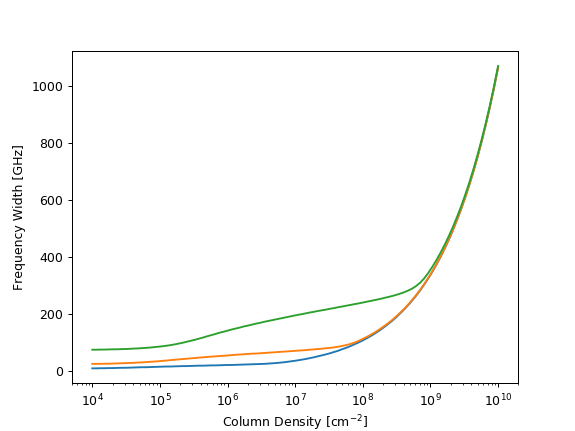

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
plt.figure()

c = 3e10 # cm/s
kB = 1.4e-16 # Boltzmann cgs
mp = 1e-24 # g 
A21 = 5e8 # s^-1 LyA
L21 = 121e-7 # cm LyA
F21 = c / L21 # Hz LyA

def lorentz(nu, A, nu0=F21):
    """Return a Lorentzian line profile function evaluated at the specified frequencies.
    Arguments:
        nu: spectral frequency [Hz]
        A: Einstein A coefficient [s^-1], default: LyA
        nu0: center frequency [Hz], default: LyA"""
    ans = A/(4*np.pi)**2 / ((nu - nu0)**2 + (A/(4*np.pi))**2)
    return ans / ans.sum()

def doppler(nu, T, nu0=F21):
    """Return a Gaussian line profile function evaluated at the specified frequencies.
    Arguments:
        nu: spectral frequency [Hz]
        T: Temperature [K]
        nu0: center frequency [Hz], default: LyA"""
    dnu = np.sqrt(2 * kB * T / mp) / L21 
    ans = 1./(dnu * np.sqrt(np.pi)) * np.exp(-(nu-nu0)**2/dnu**2)
    return ans / ans.sum()

def voigt(nu, A, T, nu0=F21):
    """Return a Gaussian line profile function evaluated at the specified frequencies.
    Arguments:
        nu: spectral frequency [Hz]
        T: Temperature [K]
        nu0: center frequency [Hz], default: LyA"""
    return np.convolve(lorentz(nu,A,nu0), doppler(nu,T,nu0), mode='same')

def sigma(nu,A,T,nu0=F21):
    """Return the cross-section for photon absorption."""
    return L21**2 / (8*np.pi) * A * voigt(nu,A,T,nu0=nu0)

nu = np.linspace(.9995*F21, 1.0005*F21, 1e4)
dnu = nu[1] - nu[0]

N = np.logspace(4, 10, 100)
T = np.array([10,100,1000])
for Ti in T:
    w = []
    for Ni in N:
        sig = sigma(nu,A21,Ti)
        prf = np.exp(-Ni * sig)
        w.append(np.where(prf < .5 + prf.min()/2, 1, 0).sum() * dnu / 1e9)
    plt.semilogx(N,w)
    plt.xlabel('Column Density [cm$^{-2}$]')
    plt.ylabel('Frequency Width [GHz]')

In [3]:
print(N)

[1.00000000e+04 1.14975700e+04 1.32194115e+04 1.51991108e+04
 1.74752840e+04 2.00923300e+04 2.31012970e+04 2.65608778e+04
 3.05385551e+04 3.51119173e+04 4.03701726e+04 4.64158883e+04
 5.33669923e+04 6.13590727e+04 7.05480231e+04 8.11130831e+04
 9.32603347e+04 1.07226722e+05 1.23284674e+05 1.41747416e+05
 1.62975083e+05 1.87381742e+05 2.15443469e+05 2.47707636e+05
 2.84803587e+05 3.27454916e+05 3.76493581e+05 4.32876128e+05
 4.97702356e+05 5.72236766e+05 6.57933225e+05 7.56463328e+05
 8.69749003e+05 1.00000000e+06 1.14975700e+06 1.32194115e+06
 1.51991108e+06 1.74752840e+06 2.00923300e+06 2.31012970e+06
 2.65608778e+06 3.05385551e+06 3.51119173e+06 4.03701726e+06
 4.64158883e+06 5.33669923e+06 6.13590727e+06 7.05480231e+06
 8.11130831e+06 9.32603347e+06 1.07226722e+07 1.23284674e+07
 1.41747416e+07 1.62975083e+07 1.87381742e+07 2.15443469e+07
 2.47707636e+07 2.84803587e+07 3.27454916e+07 3.76493581e+07
 4.32876128e+07 4.97702356e+07 5.72236766e+07 6.57933225e+07
 7.56463328e+07 8.697490

From the plot, we see that at low column densities, our width is affected strongly by temperature,
but at high column densities, our line width is measuring mostly just column density.